https://github.com/krishnaik06/Complete-Feature-Selection/blob/master/2-Feature%20Selection-%20Correlation.ipynb

# 2. Feature Selection- With Correlation¶
In this step we will be removing the features which are highly correlated

In [1]:

#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/mural/Desktop/New folder/train.csv")

# convert categ to num¶




In [3]:
from sklearn.preprocessing import OneHotEncoder 

In [4]:
Vehicle_Age = pd.get_dummies(df['Vehicle_Age'])

In [5]:
Vehicle_Damage = pd.get_dummies(df['Vehicle_Damage'])
Gender = pd.get_dummies(df['Gender'])


# drop coloumns which are converted into ohe form from main df

In [6]:
df.drop(['Vehicle_Damage', 'Vehicle_Age','Gender','id'], axis='columns', inplace=True)

In [7]:
x=pd.concat([df, Vehicle_Age,Vehicle_Damage,Gender],axis=1)
x.drop(['Response'], axis='columns', inplace=True)
x.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,1-2 Year,< 1 Year,> 2 Years,No,Yes,Female,Male
0,44,1,28.0,0,40454.0,26.0,217,0,0,1,0,1,0,1
1,76,1,3.0,0,33536.0,26.0,183,1,0,0,1,0,0,1
2,47,1,28.0,0,38294.0,26.0,27,0,0,1,0,1,0,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,0,1,0,0,1
4,29,1,41.0,1,27496.0,152.0,39,0,1,0,1,0,1,0


In [8]:
y=df.Response

In [9]:
from sklearn.model_selection import train_test_split
# separate dataset into train and test

In [10]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(304887, 14)
(76222, 14)


In [11]:
X_train.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,1-2 Year,< 1 Year,> 2 Years,No,Yes,Female,Male
Age,1.000000,-0.079340,0.042876,-0.255494,0.068146,-0.578368,-0.000112,0.692413,-0.787722,0.221083,-0.268283,0.268283,-0.145265,0.145265
Driving_License,-0.079340,1.000000,-0.001007,0.014772,-0.012407,0.043528,-0.000828,-0.037208,0.040315,-0.006919,0.016289,-0.016289,0.018596,-0.018596
Region_Code,0.042876,-0.001007,1.000000,-0.024546,-0.010608,-0.042551,-0.003498,0.037948,-0.044550,0.015511,-0.028479,0.028479,-0.000380,0.000380
Previously_Insured,-0.255494,0.014772,-0.024546,1.000000,0.003633,0.219971,0.002715,-0.278670,0.358845,-0.191933,0.823767,-0.823767,0.082123,-0.082123
Annual_Premium,0.068146,-0.012407,-0.010608,0.003633,1.000000,-0.114477,-0.001527,-0.000971,-0.024027,0.061569,-0.009768,0.009768,-0.002529,0.002529
Policy_Sales_Channel,-0.578368,0.043528,-0.042551,0.219971,-0.114477,1.000000,0.000756,-0.507779,0.571430,-0.146758,0.225311,-0.225311,0.109907,-0.109907
Vintage,-0.000112,-0.000828,-0.003498,0.002715,-0.001527,0.000756,1.000000,-0.001941,0.001399,0.001372,0.001490,-0.001490,0.002268,-0.002268
1-2 Year,0.692413,-0.037208,0.037948,-0.278670,-0.000971,-0.507779,-0.001941,1.000000,-0.918202,-0.221008,-0.284619,0.284619,-0.146578,0.146578
< 1 Year,-0.787722,0.040315,-0.044550,0.358845,-0.024027,0.571430,0.001399,-0.918202,1.000000,-0.183388,0.371285,-0.371285,0.165529,-0.165529
> 2 Years,0.221083,-0.006919,0.015511,-0.191933,0.061569,-0.146758,0.001372,-0.221008,-0.183388,1.000000,-0.207799,0.207799,-0.043783,0.043783


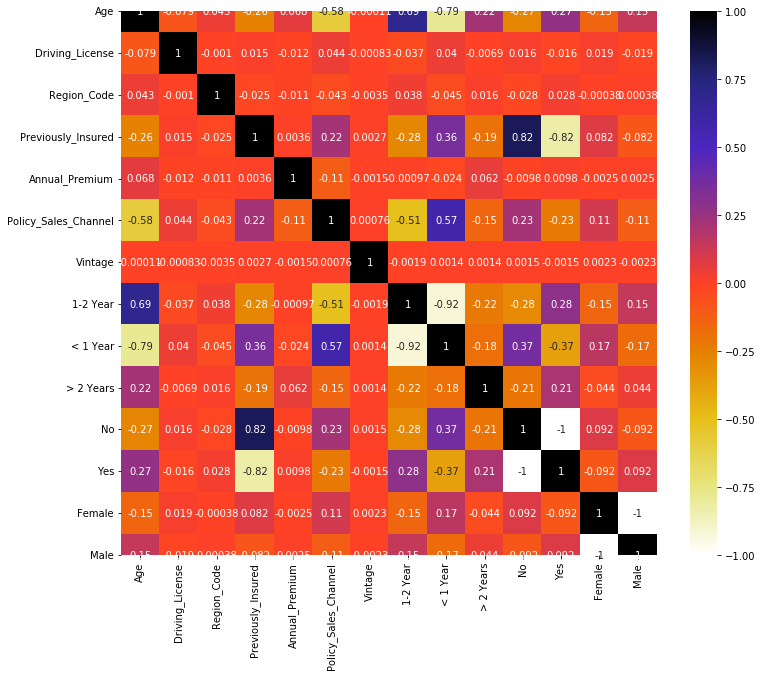

In [24]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [29]:
corr_matrix = X_train.corr()

In [30]:
len(corr_matrix.columns)

14

In [43]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [45]:
corr_features

{'< 1 Year', 'Male', 'No', 'Yes'}